<a href="https://colab.research.google.com/github/DL-NgocSon/CNNImgClassifier/blob/main/ClassifierwithMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/DL-NgocSon/CNNImgClassifier.git

Cloning into 'CNNImgClassifier'...
remote: Enumerating objects: 351, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 351 (delta 0), reused 4 (delta 0), pack-reused 347
Receiving objects: 100% (351/351), 70.03 MiB | 38.83 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.metrics import Accuracy
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(X_, y_), (X_test, y_test) = mnist.load_data()
# Create Train dataset
X_train = X_[:50000, :]
print(X_train.shape)
y_train = y_[:50000]
print(y_train.shape)
# Create Val dataset
X_val = X_[50000:60000, :]
print(X_val.shape)
y_val = y_[50000:60000]
print(y_val.shape)

11490434/11490434 [==============================] - 0s 0us/step
(50000, 28, 28)
(50000,)
(10000, 28, 28)
(10000,)


In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [5]:
y_train_onehot = to_categorical(y_train, 10)
y_val_onehot = to_categorical(y_val, 10)
y_test_onehot = to_categorical(y_test, 10)

In [6]:
model = Sequential()

In [7]:
# Thêm lớp Convolutional với 32 kernel có size 3*3.
# Dùng hàm sigmoid làm activation, ảnh đầu vào có kích thước là 28*28
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape = (28,28,1)))

In [8]:
# Thêm lớp Convolutional với 32 kernel có size 3*3.
model.add(Conv2D(32, (3, 3), activation='sigmoid'))

In [9]:
# Thêm lớp Maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))


In [10]:
# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

In [11]:
# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))

In [12]:
# Thêm Fully Connected layer với 10 nodes và dùng hàm softmax
model.add(Dense(10, activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['Accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [16]:
H = model.fit(X_train, y_train_onehot, validation_data=(X_val, y_val_onehot), batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 12s 5ms/step - loss: 0.2922 - Accuracy: 0.9150 - val_loss: 0.0693 - val_Accuracy: 0.9813
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0564 - Accuracy: 0.9834 - val_loss: 0.0510 - val_Accuracy: 0.9858
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0365 - Accuracy: 0.9889 - val_loss: 0.0472 - val_Accuracy: 0.9864
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0253 - Accuracy: 0.9927 - val_loss: 0.0392 - val_Accuracy: 0.9892
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0161 - Accuracy: 0.9958 - val_loss: 0.0445 - val_Accuracy: 0.9867
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0118 - Accuracy: 0.9968 - val_loss: 0.0440 - val_Accuracy: 0.9885
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0081 - Accuracy: 0.9980 - val_loss: 0.0421 - val_Accur

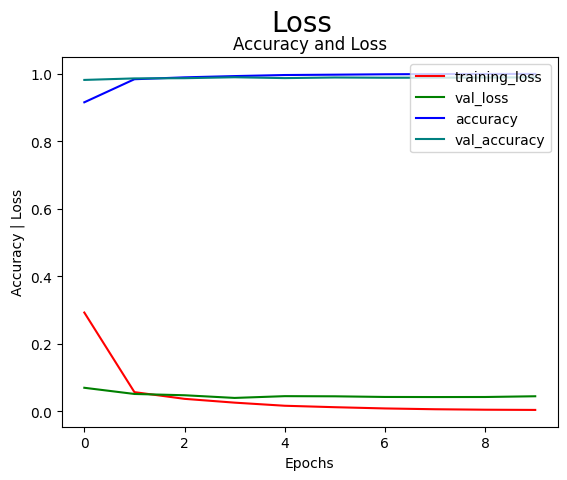

In [19]:
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label ='training_loss', color = 'red')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label ='val_loss', color = 'green')
plt.plot(np.arange(0, numOfEpoch), H.history['Accuracy'], label ='accuracy', color = 'blue')
plt.plot(np.arange(0, numOfEpoch), H.history['val_Accuracy'], label ='val_accuracy', color = 'teal')
plt.title("Accuracy and Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy | Loss")
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc="upper right")
plt.show()

1/1 [==============================] - 0s 17ms/step
Giá trị dự đoán:  4


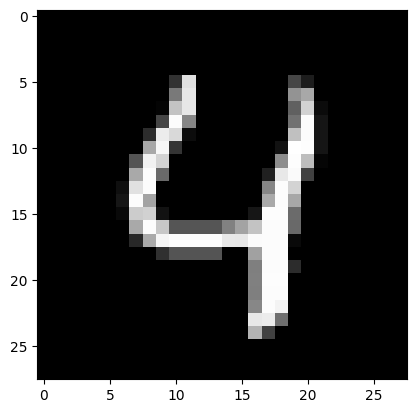

In [21]:
plt.imshow(X_test[4].reshape(28,28), cmap='gray')
y_predict = model.predict(X_test[4].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))
